# Creando Todo El Pipeline De Machine Learning Con PyCaret y Python

Este tutorial cubre todo el proceso de Machine Learning, desde la ingestión de datos, el preprocesamiento, el entrenamiento del modelo, el ajuste de hiperparámetros, la predicción y el almacenamiento del modelo para su uso posterior.

Completaremos todos estos pasos en menos de 10 comandos de construcción natural y muy intuitivos de recordar, como por ejemplo:

```
create_model(), 
tune_model(), 
compare_models()
plot_model()
evaluate_model()
predict_model()
```

Veamos el cuadro completo

**Nota** Todos este proceso también lo puedes seguir en video en los siguientes enlaces
* <a href="https://www.datacademy.dev/video-tutoriales-data-science/trabajando-el-pipeline-de-machine-learning-con-pycaret-parte-1" target="_blank">Trabajando el Pipeline de Machine Learning con PyCaret - Parte 1</a> - 32 minutos
* <a href="https://www.datacademy.dev/video-tutoriales-data-science/trabajando-el-pipeline-de-machine-learning-con-pycaret-parte-2" target="_blank">Trabajando el Pipeline de Machine Learning con PyCaret - Parte 2</a> - 24 minutos
* <a href="https://www.datacademy.dev/video-tutoriales-data-science/trabajando-el-pipeline-de-machine-learning-con-pycaret-parte-3" target="_blank">Trabajando el Pipeline de Machine Learning con PyCaret - Parte 3</a> - 34 minutos
* <a href="https://www.datacademy.dev/video-tutoriales-data-science/trabajando-el-pipeline-de-machine-learning-con-pycaret-parte-4" target="_blank">Trabajando el Pipeline de Machine Learning con PyCaret - Parte 2</a> - 25 minutos

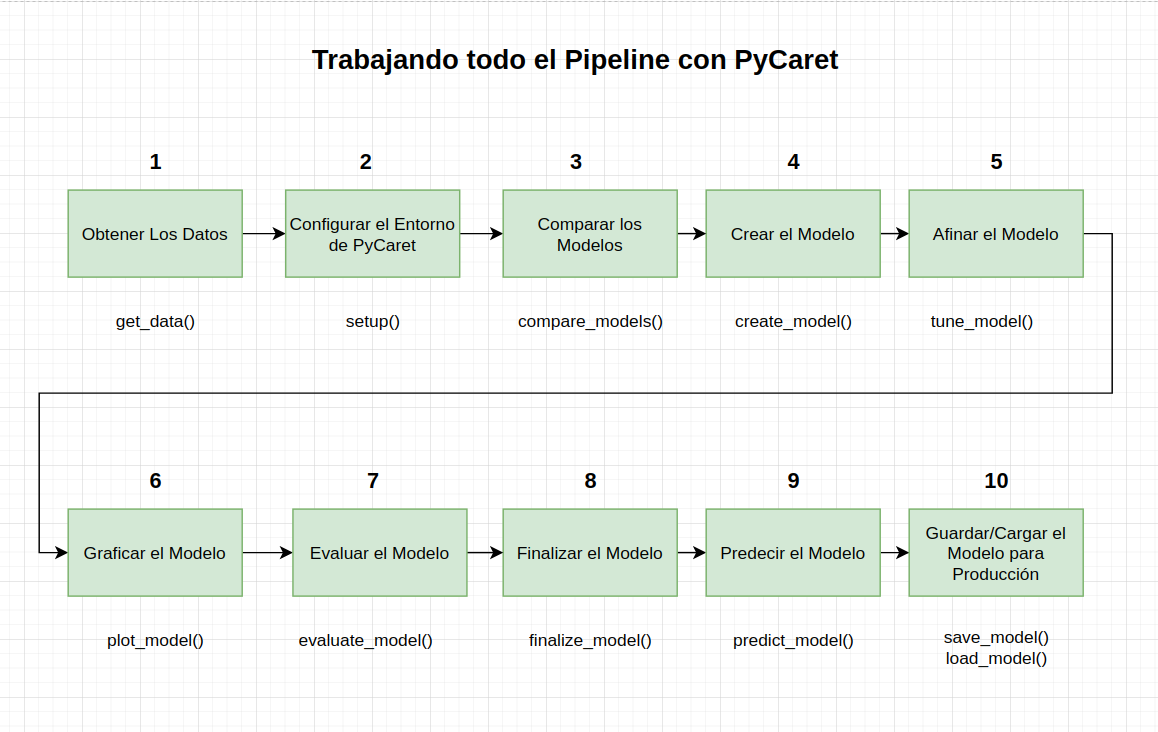

Recrear el experimento completo sin PyCaret requiere más de 100 líneas de código en la mayoría de las librerias. PyCaret también permite hacer cosas más avanzadas, como el preprocesamiento avanzado, ensamblaje, apilamiento generalizado y otras técnicas que permiten personalizar completamente el pipeline de Machine Learning y que son imprescindibles para cualquier científico de datos.

PyCaret es una librería de código abierto de bajo nivel para Machine Learning con Python que permite pasar de la preparación de los datos al despliegue del modelo en minutos. Permite a los científicos y analistas de datos realizar experimentos iterativos de ciencia de datos de principio a fin de forma eficiente y les permite llegar a conclusiones más rápidamente porque se dedica mucho menos tiempo a la programación. Esta biblioteca es muy similar a Caret de R, pero implementada en python

Cuando se trabaja en un proyecto de ciencia de datos, normalmente se tarda mucho tiempo en entender los datos (EDA e ingeniería de características). Entonces, ¿qué pasaría si pudiéramos reducir a la mitad el tiempo que dedicamos a la parte de modelado del proyecto?

Veamos cómo

Primero necesitamos estos requisitos previos

* Python 3.6 o posterior
* PyCaret 2.0 o posterior

Aquí puedes encontrar la documentación de la <a href="https://pycaret.org/" target="_blank">librería</a> y otros.

Antes de nada, estas son las versiones para que el codigo ejecute correctamente:
* **`!pip3 install pycaret==2.2.3`**
* **`!pip3 install scikit-learn==0.23.2`**

Para los usuarios de Google Colab: Si está ejecutando este notebook en Google Colab, ejecute el siguiente código en la parte superior de su notebook para mostrar imágenes interactivas

```
from pycaret.utils import enable_colab
enable_colab()
```

In [1]:
# !pip3 install pycaret==2.2.3

In [2]:
# !pip3 install scikit-learn==0.23.2

## Módulos de Pycaret

Pycaret está dividido según la tarea que queramos realizar, y tiene diferentes módulos, que representan cada tipo de aprendizaje (supervisado o no supervisado). Para este tutorial, trabajaremos en el módulo de aprendizaje supervisado con un algoritmo de clasificación binaria.

### Módulo de clasificación
El módulo de clasificación de PyCaret (`pycaret.classification`) es un módulo de aprendizaje automático supervisado que se utiliza para clasificar elementos en un grupo binario basándose en varias técnicas y algoritmos. Algunos usos comunes de los problemas de clasificación incluyen la predicción de la falta de pago del cliente (sí o no), el abandono del cliente (el cliente se irá o se quedará), una enfermedad encontrada (positiva o negativa), etc.

El módulo de clasificación de PyCaret puede utilizarse para problemas de clasificación binarios o multiclase. Tiene más de 18 algoritmos y 14 gráficos para analizar el rendimiento del modelo. Ya sea el ajuste de hiperparámetros, ensamblaje o técnicas avanzadas como el apilamiento, el módulo de clasificación de PyCaret lo tiene todo. 

Modelos de clasificación

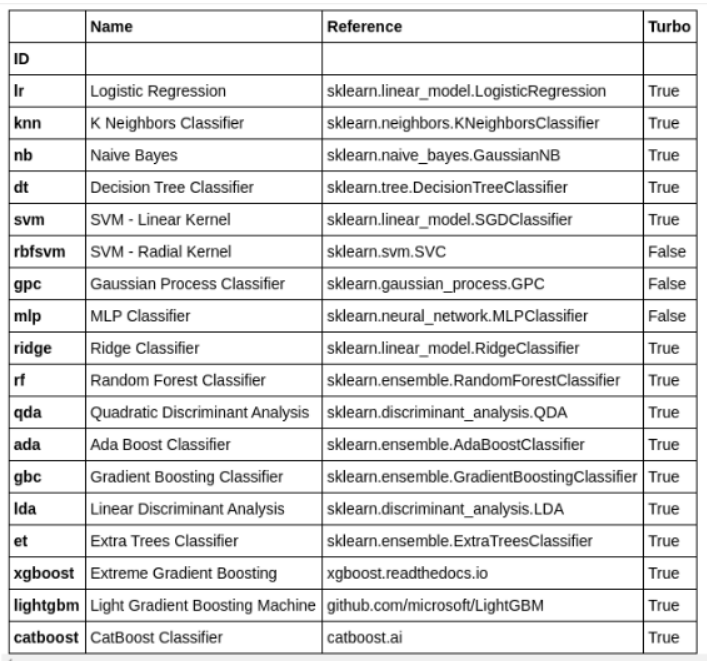

Para este tutorial utilizaremos un conjunto de datos de UCI Machine Learning llamado Default of Credit Card Clients. Este conjunto de datos contiene información sobre impagos, datos demográficos, datos de crédito, historial de pagos y extractos de facturación de clientes de tarjetas de crédito desde abril de 2005 hasta septiembre de 2005. Hay 24.000 muestras y 25 características.

## 1- Obtener los datos

Esta será la forma por defecto con la que trabajaremos en este tutorial. Es directamente desde los conjuntos de datos de PyCaret, y es el primer método de nuestro Pipeline

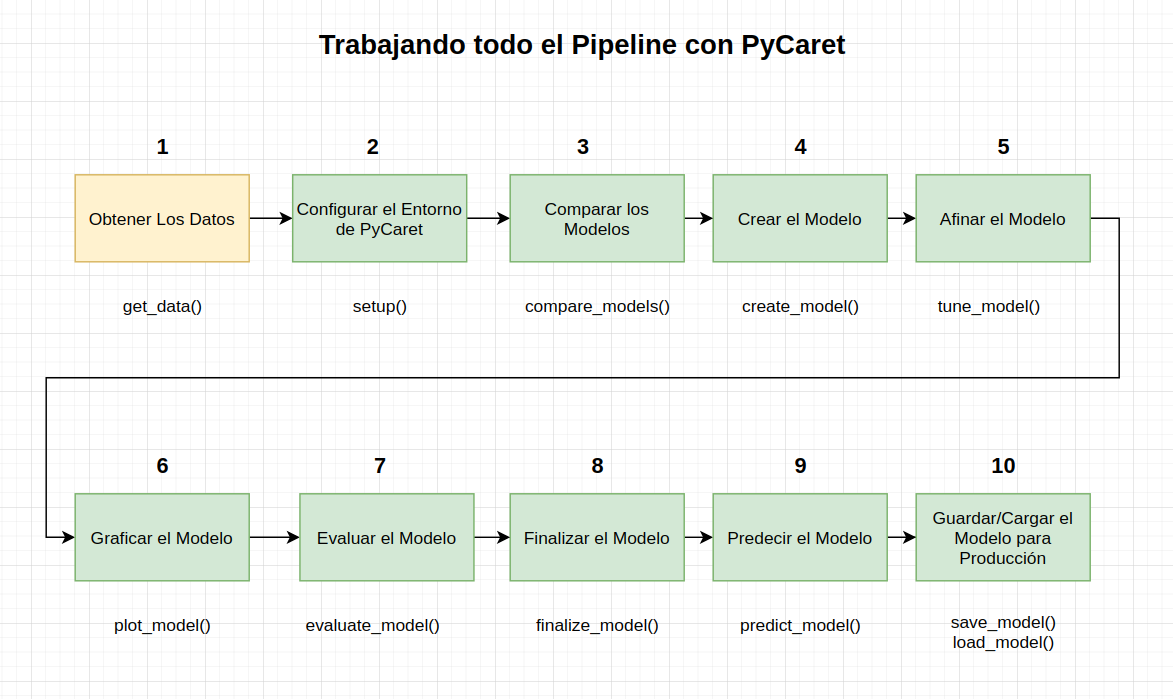

In [3]:
import pandas as pd

In [4]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [5]:
#check the shape of data
dataset.shape

(24000, 24)

Para demostrar la función `predict_model()` en datos no vistos, se ha conservado una muestra de 1200 registros del conjunto de datos original para utilizarla en las predicciones. Esto no debe confundirse con una división de entrenamiento/prueba, ya que esta división particular se hace para simular un escenario de la vida real. Otra forma de pensar en esto es que estos 1200 registros no están disponibles en el momento de realizar el experimento de Machine Learning.

In [6]:
## sample devuelve una muestra aleatoria de un eje del objeto. Serían 22.800 muestras, no 24.000
data = dataset.sample(frac=0.95, random_state=786)

In [7]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
20534,270000,2,1,2,34,0,0,2,0,0,...,44908.0,19508.0,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0
6885,160000,2,1,2,42,-2,-2,-2,-2,-2,...,0.0,741.0,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0
1553,360000,2,1,2,30,0,0,0,0,0,...,146117.0,145884.0,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0
1952,20000,2,1,2,25,0,0,0,0,0,...,18964.0,19676.0,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0
21422,70000,1,2,2,29,0,0,0,0,0,...,48538.0,49034.0,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,130000,1,3,2,45,0,0,-1,0,-1,...,1261.0,390.0,390.0,1000.0,2522.0,0.0,390.0,390.0,390.0,0
8641,290000,2,1,2,29,0,0,0,0,-1,...,-77.0,8123.0,210989.0,1690.0,3000.0,0.0,8200.0,205000.0,6000.0,0
6206,210000,1,2,1,41,1,2,0,0,0,...,69670.0,59502.0,119494.0,0.0,5000.0,3600.0,2000.0,2000.0,5000.0,0
2110,550000,1,2,1,47,0,0,0,0,0,...,30000.0,0.0,0.0,10000.0,20000.0,5000.0,0.0,0.0,0.0,0


In [8]:
# eliminamos del conjunto de datos original estos datos aleatorios
data_unseen = dataset.drop(data.index)

In [9]:
data_unseen

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
39,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
57,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
72,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
103,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23978,50000,1,2,1,37,1,2,2,2,0,...,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1
23979,220000,1,2,1,41,0,0,-1,-1,-2,...,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0
23981,420000,1,1,2,34,0,0,0,0,0,...,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0
23985,90000,1,2,1,36,0,0,0,0,0,...,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1


In [10]:
## restablecemos el índice de ambos conjuntos de datos
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


## Dividir los datos

La forma en que dividimos nuestro conjunto de datos es importante porque hay datos que no utilizaremos durante el proceso de modelado y que utilizaremos al final para validar nuestros resultados mediante la simulación de datos reales. Los datos que utilizamos para el modelado los subdividimos para evaluar dos escenarios, el de entrenamiento y el de prueba. Por lo tanto, se ha hecho lo siguiente

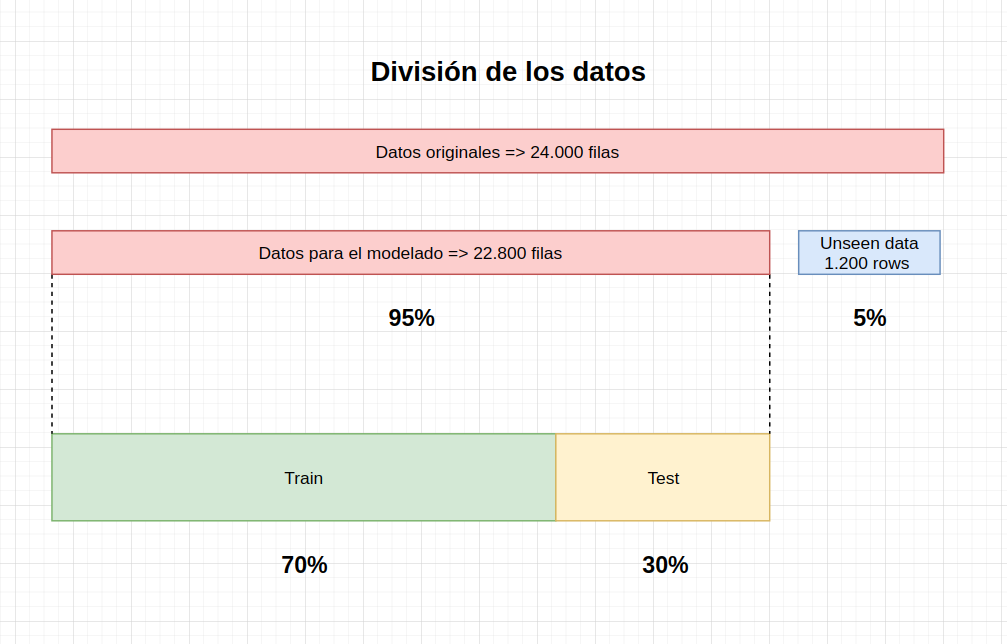

### Conjunto de datos no vistos (también conocido como conjunto de datos de validación) - unseen data
* Es la muestra de datos utilizada para proporcionar una evaluación no sesgada de un modelo final.
* El conjunto de datos de validación proporciona el estándar de oro utilizado para evaluar el modelo. 
* Sólo se utiliza una vez que el modelo está completamente entrenado (utilizando los conjuntos de entrenamiento y prueba).
* El conjunto de validación es generalmente el que se utiliza para evaluar los modelos de una competición (por ejemplo, en muchas competiciones de <a href="https://www.datasource.ai/en" target="_blank">DataSource.ai</a> o de <a href="https://www.kaggle.com/competitions" target="_blank">Kaggle</a> el conjunto de prueba se libera inicialmente junto con el conjunto de entrenamiento y el conjunto de validación sólo se libera cuando la competición está a punto de cerrarse (o para hacer las validaciones internas), y es el resultado del modelo del conjunto de validación el que decide el ganador.
* Muchas veces se utiliza el conjunto de prueba como conjunto de validación, pero no es una buena práctica. 
* El conjunto de validación suele estar bien curado. 
* Contiene datos cuidadosamente muestreados que cubren las distintas clases a las que se enfrentaría el modelo, cuando se utilice en el mundo real.

### Conjunto de datos de entrenamiento
* Conjunto de datos de entrenamiento: La muestra de datos utilizada para entrenar el modelo.
* El conjunto de datos que utilizamos para entrenar el modelo.
* El modelo ve y aprende de estos datos.

### Conjunto de datos de prueba
* Conjunto de datos de prueba: La muestra de datos utilizada para proporcionar una evaluación insesgada de un modelo se equipara al conjunto de datos de entrenamiento mientras se ajustan los hiperparámetros del modelo. 
* La evaluación se vuelve más sesgada a medida que la habilidad del conjunto de datos de prueba se incorpora a la configuración del modelo.
* El conjunto de pruebas se utiliza para evaluar un modelo determinado, pero esto es para una evaluación frecuente. 
* Nosotros, como ingenieros de Machine Learning, utilizamos estos datos para afinar los hiperparámetros del modelo. 
* Por lo tanto, el modelo ve ocasionalmente estos datos, pero nunca "aprende" de ellos. 
* Usamos los resultados del conjunto de pruebas y actualizamos los hiperparámetros de nivel superior.
* Así que el conjunto de pruebas afecta al modelo, pero sólo indirectamente. 
* El conjunto de pruebas también se conoce como conjunto de desarrollo. Esto tiene sentido, ya que este conjunto de datos ayuda durante la etapa de "desarrollo" del modelo.

### Confusión de términos
* Hay una tendencia a confundir el nombre de prueba (test) y validación.
* Dependiendo del tutorial, la fuente, el libro, el vídeo o el profesor/mentor se cambian los términos, lo importante es mantener el concepto.
* En nuestro caso ya separamos el conjunto de validación al principio (1.200 muestras de `data_unseen`)

## 2- Configurar el entorno de PyCaret

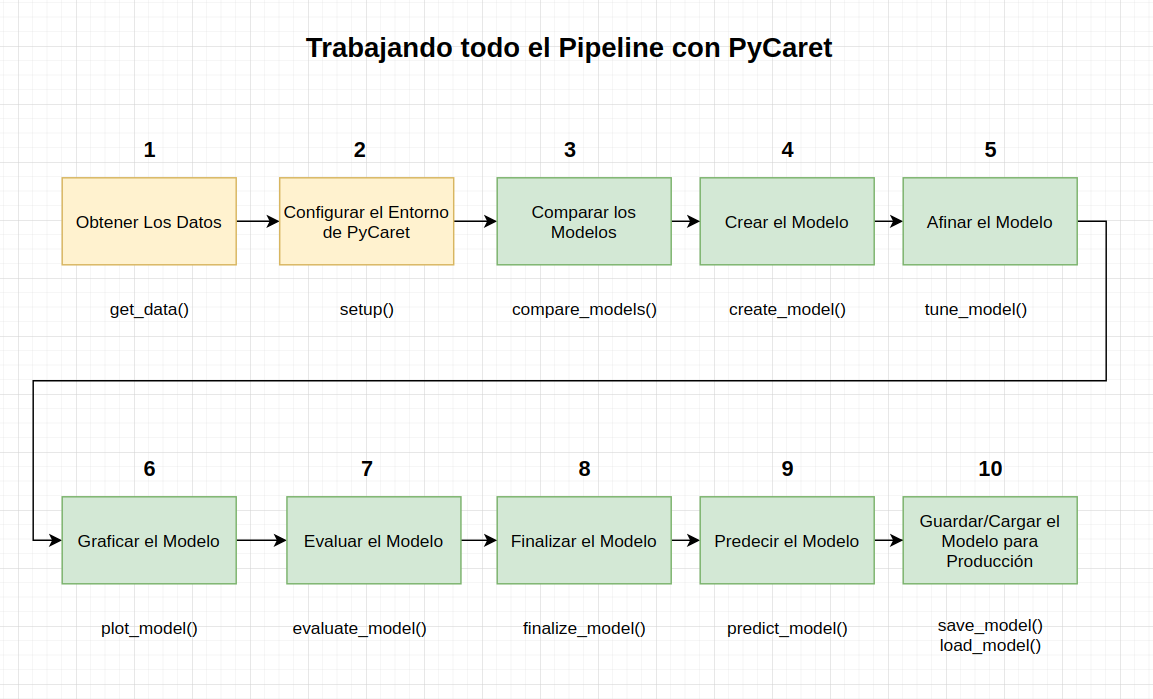

Ahora vamos a configurar el entorno de Pycaret. La función `setup()` inicializa el entorno en pycaret y crea el pipeline de transformación para preparar los datos para su modelado y despliegue. La función `setup()` debe ser llamada antes de ejecutar cualquier otra función en pycaret. Toma dos parámetros obligatorios: un dataframe de pandas y el nombre de la columna de destino. La mayor parte de la configuración se hace de forma automática, pero algunos parámetros se pueden establecer manualmente. Por ejemplo:

* El ratio de división por defecto es `70:30` (como vimos en el párrafo anterior), pero se puede cambiar con "`train_size`".
* La validación cruzada K-fold se establece en `10` por defecto
* "`session_id`" es nuestro clásico "`random_state`"

In [11]:
## setting up the environment
from pycaret.classification import *

In [12]:
#!pip3 install preprocessing

**Nota**: Después de ejecutar el siguiente comando deben presionar enter para terminar el proceso. Explicaremos cómo lo hacen. El proceso de configuración puede tardar algún tiempo en completarse.

In [13]:
model_setup = setup(data=data, target='default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Cuando se ejecuta `setup()`, el algoritmo de inferencia de PyCaret deducirá automáticamente los tipos de datos de todas las características basándose en ciertas propiedades. El tipo de datos debería inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de ejecutar `setup()`. Si todos los tipos de datos se identifican correctamente, se puede pulsar enter para continuar o exit para terminar el experimento. Pulsamos enter, y debería salir la misma salida que obtuvimos anteriormente.

Asegurarse de que los tipos de datos son correctos es fundamental en PyCaret, ya que realiza automáticamente algunas tareas de preprocesamiento que son esenciales para cualquier experimento de Machine Learning. Estas tareas se realizan de forma diferente para cada tipo de datos, por lo que es muy importante que estén correctamente configuradas.

Podemos sobreescribir el tipo de datos inferidos desde PyCaret utilizando los parámetros `numeric_features` y `categorical_features` en `setup()`. Una vez que la configuración se ha ejecutado con éxito, se imprime la grilla de información que contiene varios datos importantes. La mayor parte de la información está relacionada con la tubería de preprocesamiento que se construye cuando se ejecuta `setup()`.

La mayoría de estas características están fuera del alcance de este tutorial, sin embargo, algunas cosas importantes a tener en cuenta en esta etapa incluyen

* `session_id` : Un número pseduo-aleatorio distribuido como semilla en todas las funciones para su posterior reproducibilidad. 
* Tipo de objetivo : Binario o Multiclase. El tipo de objetivo se detecta automáticamente y se muestra.
* Etiqueta codificada: Cuando la variable Target es de tipo cadena (es decir, 'Sí' o 'No') en lugar de 1 o 0, codifica automáticamente la etiqueta en 1 y 0 y muestra el mapeo `(0 : No, 1 : Sí)` como referencia
* Datos originales : Muestra la forma original del conjunto de datos. En este experimento `(22800, 24)` ==> Recuerde: "Ver datos"
* Valores perdidos : Cuando hay valores que faltan en los datos originales, esto se mostrará como `Verdadero`.
* Características numéricas: El número de características inferidas como numéricas. 
* Características categóricas: El número de características inferidas como categóricas
* Conjuntos de train transformado: Obsérvese que la forma original de `(22800, 24)` se transforma en `(15959, 91)` para el conjunto de entrenamiento transformado y **el número de características ha aumentado de `24` a `91` debido a la codificación categórica**.
* Conjunto de pruebas transformado: Hay `6.841` muestras en el conjunto de pruebas. Esta división se basa en el valor por defecto de `70/30`, que puede modificarse mediante el parámetro `train_size` de la configuración.

Obsérvese cómo algunas tareas que son imprescindibles para realizar el modelado se manejan automáticamente, como la imputación de valores perdidos (en este caso no hay valores perdidos en los datos de entrenamiento, pero aún así necesitamos imputaciones para los datos no vistos), la codificación categórica, etc.

La mayoría de los parámetros de `setup()` son opcionales y se utilizan para personalizar el preprocesamiento. 

## 3- Comparar modelos

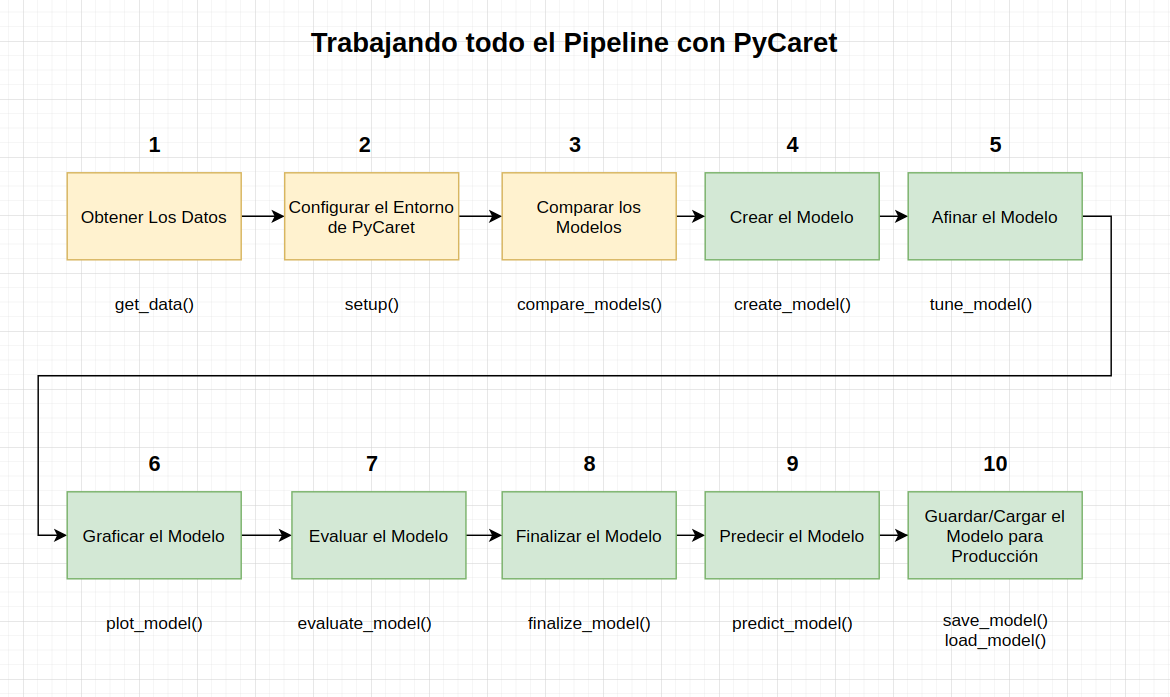

Para entender cómo PyCaret compara los modelos y los siguientes pasos en el proceso, es necesario entender el concepto de N-Fold Coss-Validation. 

### N-Fold Coss-Validation
Calcular la cantidad de datos que debe dividirse en el conjunto de datos es una cuestión delicada. Si su conjunto de entrenamiento es demasiado pequeño, su algoritmo puede no tener suficientes datos para aprender eficazmente. Por otro lado, si su conjunto de pruebas es demasiado pequeño, su exactitud, precisión, recall y puntuación F1 podrían tener una gran variación.  

Puede tener mucha suerte o muy mala suerte. En general, poner el 70% de los datos en el conjunto de entrenamiento y el 30% de los datos en el conjunto de prueba es un buen punto de partida. A veces, su conjunto de datos es tan pequeño que dividirlo 70/30 dará lugar a una gran cantidad de varianza. 

Una solución para esto es realizar una validación cruzada N-Fold. La idea central aquí es que vamos a hacer todo este proceso `N` veces y luego promediar la precisión. Por ejemplo, en una validación cruzada de 10 veces, haremos que el conjunto de prueba sea el primer 10% de los datos y calcularemos la exactitud, la precisión, el recall y la puntuación F1.

A continuación, haremos que la validación cruzada establezca el segundo 10% de los datos y calcularemos de nuevo estas estadísticas. Podemos hacer este proceso 10 veces, y cada vez el conjunto de prueba será un dato diferente. Luego hacemos una media de todas las precisiones, y tendremos una mejor idea de cómo funciona nuestro modelo en promedio.

**Nota: El conjunto de validación (amarillo aquí) es el conjunto de prueba en nuestro caso**

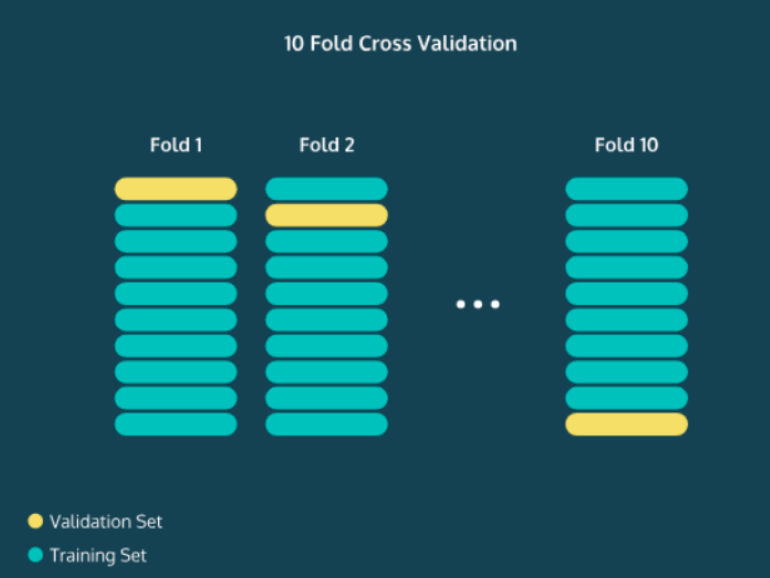

Comprender la precisión de su modelo es muy valioso porque puede empezar a ajustar los parámetros de su modelo para aumentar su rendimiento. Por ejemplo, en el algoritmo K-Nearest Neighbors, puede ver lo que ocurre con la precisión a medida que aumenta o disminuye `K`. Una vez que esté satisfecho con el rendimiento de su modelo, es el momento de introducir el conjunto de validación. Esta es la parte de tus datos que dividiste al principio de su experimento (`unseen_data` en nuestro caso). 

Se supone que es un sustituto de los datos del mundo real que usted está realmente interesado en clasificar. Funciona de forma muy similar al conjunto de pruebas, salvo que usted nunca tocó estos datos mientras construía o refinaba su modelo. Al encontrar las métricas de precisión, se obtiene una buena comprensión de lo bien que funcionará su algoritmo en el mundo real.

### Comparación de todos los modelos
Comparar todos los modelos para evaluar el rendimiento es el punto de partida recomendado para el modelado una vez que PyCaret `setup()` se ha completado (a menos que usted sepa exactamente qué tipo de modelo se necesita, que a menudo no es el caso), esta función entrena todos los modelos en la biblioteca de modelos y los califica utilizando una validación cruzada estratificada para la evaluación de las métricas.

La salida imprime una cuadrícula de puntuación que muestra el promedio de la Exactitud, AUC, Recall, Precisión, F1, Kappa, y MCC a través de los pliegues (`10` por defecto) junto con los tiempos de entrenamiento. ¡Vamos a hacerlo!

In [14]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0,0.3637,0.6913,0.4764,0.3836,0.4122,0.035
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.257
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.401,2.123
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.369,0.3983,0.531
catboost,CatBoost Classifier,0.8215,0.776,0.3657,0.6678,0.4724,0.3759,0.4007,6.041
lightgbm,Light Gradient Boosting Machine,0.821,0.775,0.3609,0.6679,0.4683,0.3721,0.3977,0.151
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,1.211
xgboost,Extreme Gradient Boosting,0.816,0.7561,0.3629,0.6391,0.4626,0.3617,0.3829,1.682
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,1.009
lr,Logistic Regression,0.7814,0.641,0.0003,0.1,0.0006,0.0003,0.0034,0.686


La función `compare_models()` permite comparar muchos modelos a la vez. Esta es una de las grandes ventajas de usar PyCaret. En una línea, tienes una tabla de comparación entre muchos modelos. Con dos simples palabras de código (ni siquiera una línea) se han entrenado y evaluado más de 15 modelos utilizando la validación cruzada N-Fold.

La tabla impresa arriba destaca las métricas de mayor rendimiento sólo para fines de comparación. La tabla por defecto se ordena utilizando "Accuracy" (de mayor a menor), lo que puede cambiarse pasando un parámetro. Por ejemplo, `compare_models(sort = 'Recall')` ordenará la tabla por Recall en lugar de Accuracy.

Si quiere cambiar el parámetro `Fold` del valor por defecto de `10` a un valor diferente, puede utilizar el parámetro `fold`. Por ejemplo, `compare_models(fold = 5)` comparará todos los modelos en una validación cruzada de 5 pliegues. Reducir el número de pliegues mejorará el tiempo de entrenamiento. 

Por defecto, `compare_models` devuelve el modelo de mejor rendimiento basado en el orden de clasificación por defecto, pero puede utilizarse para devolver una lista de los N mejores modelos utilizando el parámetro `n_select`. Además, devuelve algunas métricas como la precisión, AUC y F1. Otra cosa interesante es cómo la biblioteca destaca automáticamente los mejores resultados. Una vez que elijas tu modelo, puedes crearlo y luego refinarlo. Vamos con otros métodos.

In [15]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


## 4- Crear el modelo

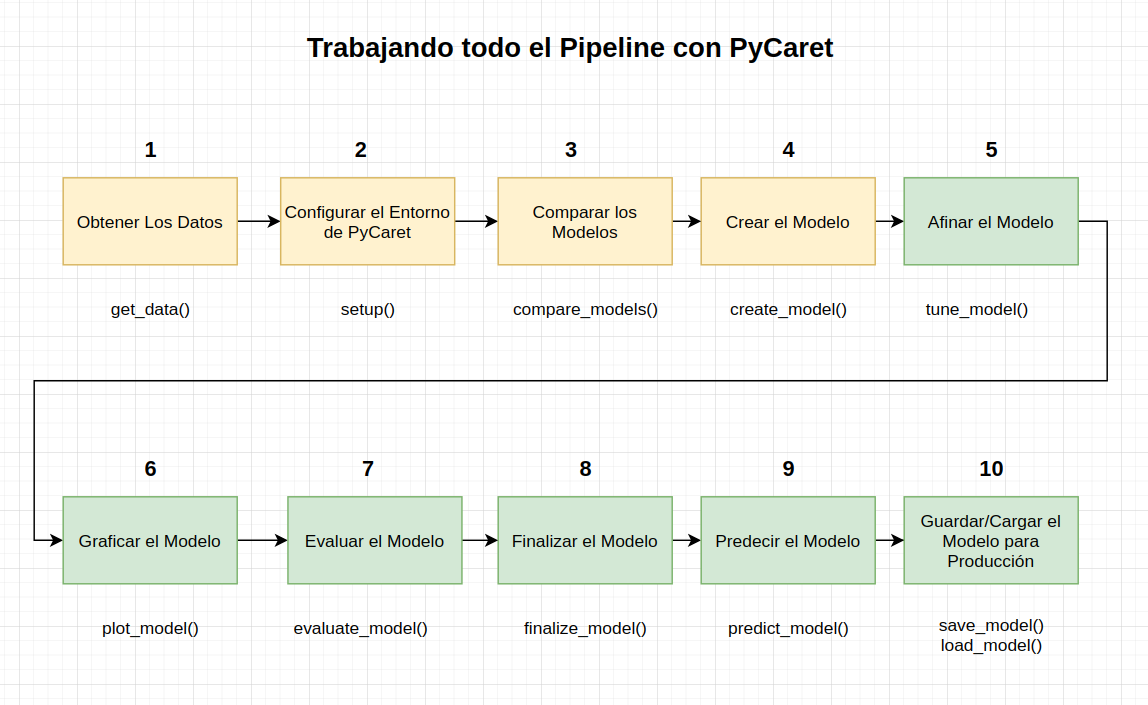

`create_model` es la función más granular de PyCaret y suele ser la base de la mayor parte de la funcionalidad de PyCaret. Como su nombre indica, esta función entrena y evalúa un modelo utilizando una validación cruzada que se puede establecer con el parámetro `fold`. La salida imprime una tabla de puntuación que muestra por pliegue la Precisión, AUC, Recall, F1, Kappa y MCC.

Para el resto de este tutorial, trabajaremos con los siguientes modelos como nuestros modelos candidatos. Las selecciones son sólo para fines ilustrativos y no significan necesariamente que sean los de mejor rendimiento o ideales para este tipo de datos

* Clasificador de árbol de decisiones ('dt')
* Clasificador K Neighbors ('knn')
* Clasificador Random Forest ('rf')

Hay 18 clasificadores disponibles en la biblioteca de modelos PyCaret. Para ver una lista de todos los clasificadores, consulte la documentación o utilice la función `models()` para ver la biblioteca.

In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [17]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.4327,0.4005,0.416,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4,0.224,0.2242
4,0.7187,0.6054,0.404,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.196
6,0.7206,0.6128,0.4212,0.376,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.361,0.383,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.384,0.2036,0.2038
9,0.7442,0.6272,0.4195,0.4148,0.4171,0.2533,0.2533


In [18]:
#El objeto del modelo entrenado se almacena en la variable "dt". 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [19]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.602,0.192,0.3545,0.2491,0.1128,0.1204
1,0.755,0.5894,0.2092,0.3883,0.2719,0.1402,0.15
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.079
4,0.7563,0.5908,0.149,0.3611,0.211,0.0954,0.1085
5,0.755,0.5997,0.1748,0.372,0.2378,0.1139,0.1255
6,0.7638,0.589,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.624,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.15
9,0.7549,0.5756,0.1897,0.3771,0.2524,0.1246,0.1351


In [20]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [21]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7673,0.361,0.6269,0.4582,0.3551,0.3749
1,0.8239,0.7615,0.3782,0.6735,0.4844,0.3882,0.4117
2,0.8258,0.7708,0.3467,0.7076,0.4654,0.3756,0.4098
3,0.8177,0.7605,0.3725,0.6436,0.4719,0.371,0.3913
4,0.8208,0.7642,0.3725,0.6599,0.4762,0.378,0.4006
5,0.8283,0.7638,0.3954,0.6866,0.5018,0.407,0.4297
6,0.8127,0.7647,0.3582,0.625,0.4554,0.3522,0.3721
7,0.8283,0.739,0.3553,0.7168,0.4751,0.3861,0.4202
8,0.8108,0.7496,0.361,0.6146,0.4549,0.3496,0.3678
9,0.8176,0.7565,0.3621,0.6462,0.4641,0.3645,0.3867


In [22]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Observe que la puntuación media de todos los modelos coincide con la puntuación impresa en `compare_models()`. Esto se debe a que las métricas impresas en la tabla de puntuación de `compare_models()` son las puntuaciones medias de todos los pliegues. 

También puede ver en cada `print()` de cada modelo los hiperparámetros con los que fueron construidos. Esto es muy importante porque es la base para mejorarlos. Puedes ver los parámetros del `RandomForestClassifier`.

```
max_depth=None
max_features='auto'
min_samples_leaf=1
min_samples_split=2
min_weight_fraction_leaf=0.0
n_estimadores=100
n_jobs=-1
```

## 5- Afinando del modelo

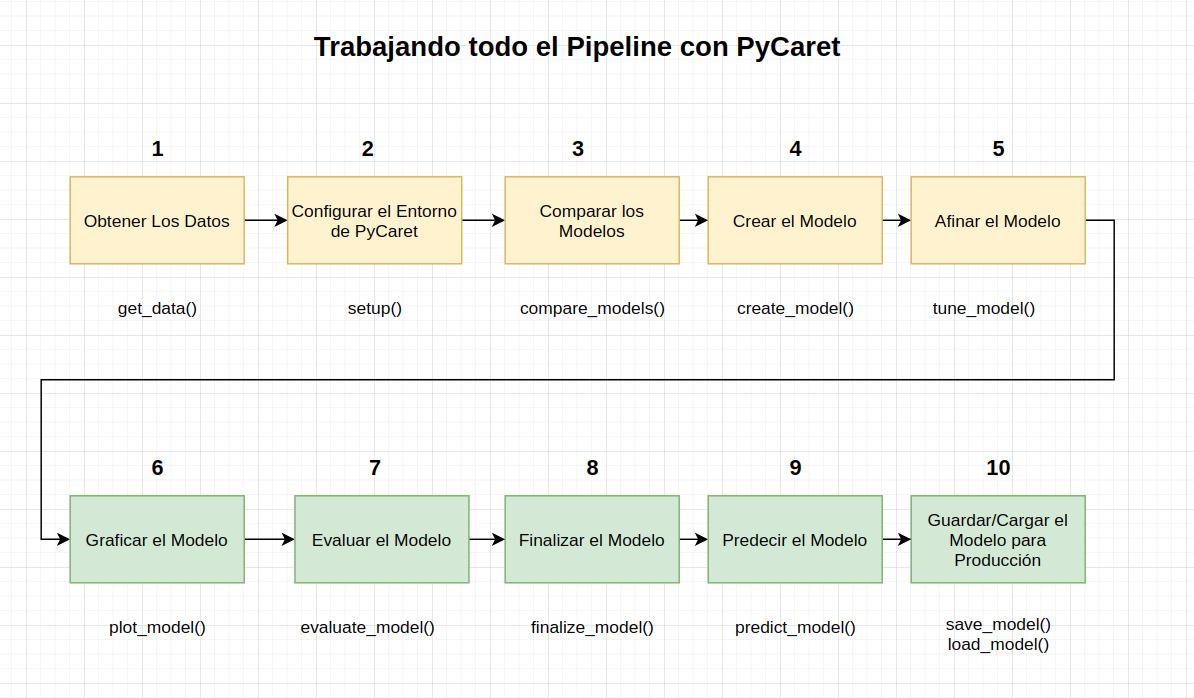

Cuando se crea un modelo utilizando la función `create_model()` se utilizan los hiperparámetros por defecto para entrenar el modelo. Para ajustar los hiperparámetros se utiliza la función `tune_model()`. Esta función ajusta automáticamente los hiperparámetros de un modelo utilizando la **Random Grid Search** en un espacio de búsqueda predefinido.

La salida imprime una tabla de puntuación que muestra la exactitud, AUC, Recall, Precisión, F1, Kappa y MCC por pliegue para el mejor modelo. Para utilizar un search grid personalizado, puede pasar el parámetro `custom_grid` en la función `tune_model`. 

In [23]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.817,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7506,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.817,0.753,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.298,0.6933,0.4168,0.3286,0.3699
9,0.8207,0.7484,0.3132,0.6987,0.4325,0.3439,0.3831


Si comparamos las métricas de exactitud de este modelo refinado de RandomForestClassifier con el anterior RandomForestClassifier, vemos una diferencia, ya que pasó de una exactitud de `0,8199` a una exactitud de `0,8203`.

In [24]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Comparemos ahora los hiperparámetros. Antes teníamos estos.

```
max_depth=None
max_features='auto'
min_samples_leaf=1
min_samples_split=2
min_weight_fraction_leaf=0.0
n_estimadores=100
n_jobs=-1
```

Ahora estos:
```
max_depth=5
max_features=1.0
min_samples_leaf=5
min_samples_split=10
min_weight_fraction_leaf=0.0
n_estimadores=150
n_jobs=-1
```

Puede hacer esta misma comparación con `knn` y `dt` por sí mismo y explorar las diferencias en los hiperparámetros. 

Por defecto, `tune_model` optimiza la Precisión, pero esto puede cambiarse usando el parámetro `optimize`. Por ejemplo: `tune_model(dt, optimize = 'AUC')` buscará los hiperparámetros de un Clasificador de Árbol de Decisión que dé como resultado el mayor AUC en lugar de la Precisión. Para los propósitos de este ejemplo, hemos utilizado la métrica por defecto de Accuracy sólo por simplicidad.

Por lo general, cuando el conjunto de datos está desequilibrado (como el conjunto de datos de crédito con el que estamos trabajando), Exactitud no es una buena métrica a tener en cuenta. La metodología subyacente a la selección de la métrica correcta para evaluar una calificación está fuera del alcance de este tutorial.

Las métricas por sí solas no son el único criterio que debe considerar al seleccionar el mejor modelo para producción. Otros factores a considerar son el tiempo de entrenamiento, la desviación estándar de los k-folds, etc. Por ahora, vamos a seguir adelante y considerar el clasificador Random Forest `tuned_rf`, como nuestro mejor modelo para el resto de este tutorial

## 6- Graficando del modelo

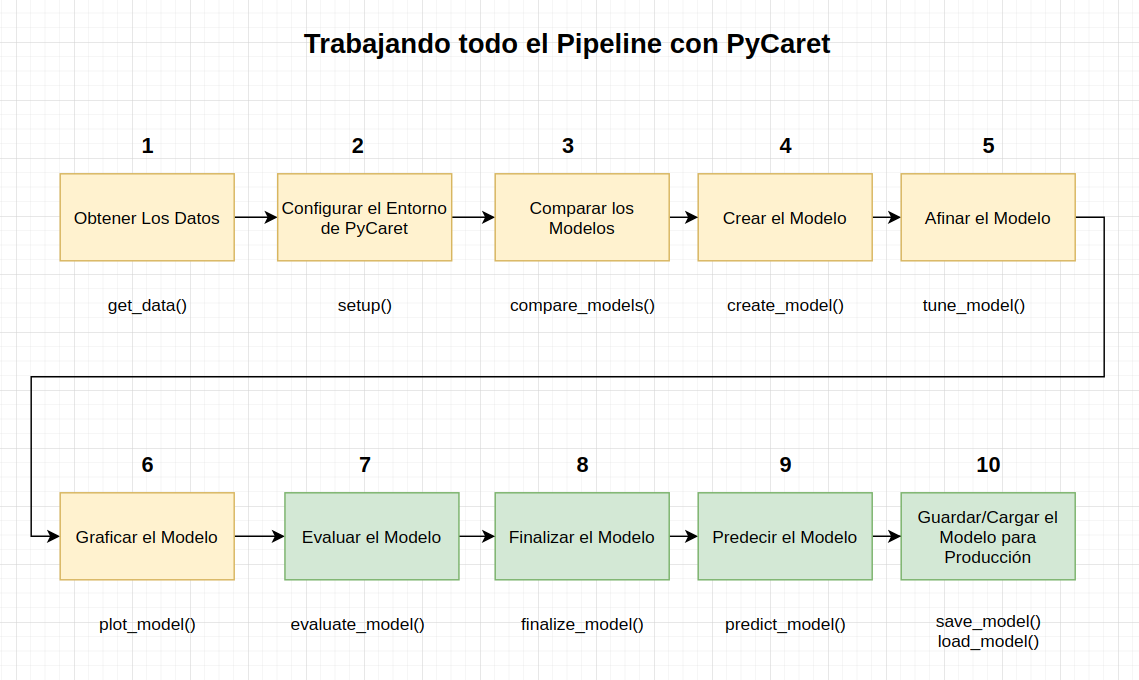

Antes de finalizar el modelo (Paso # 8), la función `plot_model()` se puede utilizar para analizar el rendimiento a través de diferentes aspectos como AUC, matriz de confusión, límite de decisión, etc. Esta función toma un objeto modelo entrenado y devuelve un gráfico basado en el conjunto de entrenamiento/prueba.

Hay 15 gráficos diferentes disponibles, por favor consulte la documentación de `plot_model()` para ver una lista de los gráficos disponibles. 

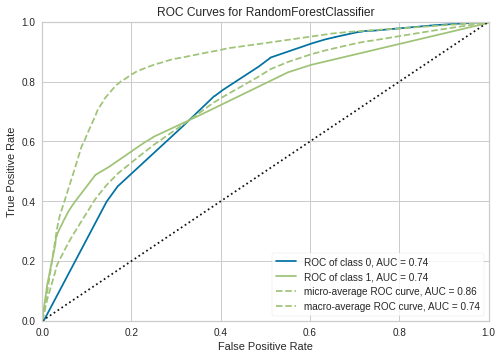

In [25]:
## AUC Plot

plot_model(tuned_rf, plot = 'auc')

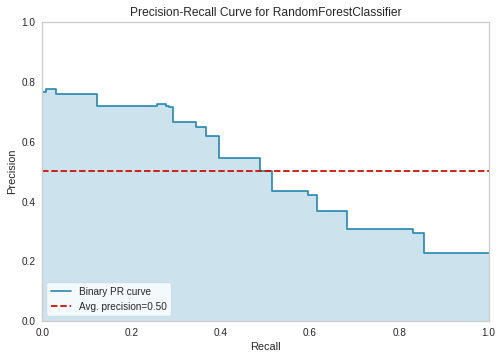

In [26]:
## Precision-recall curve

plot_model(tuned_rf, plot = 'pr')

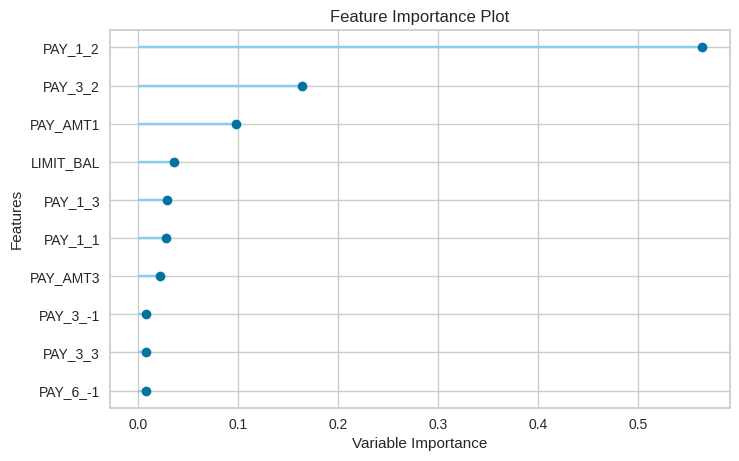

In [27]:
## feature importance

plot_model(tuned_rf, plot='feature')

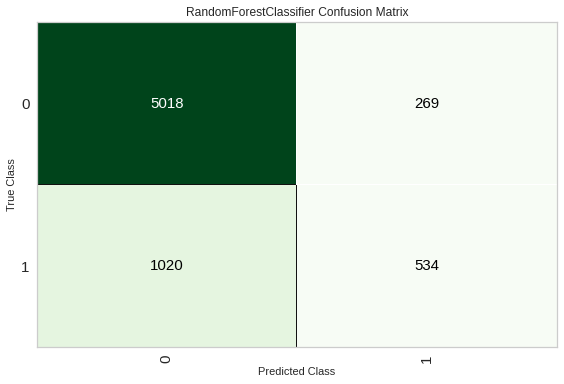

In [35]:
## Consufion matrix

plot_model(tuned_rf, plot = 'confusion_matrix')

## 7- Evaluación del modelo

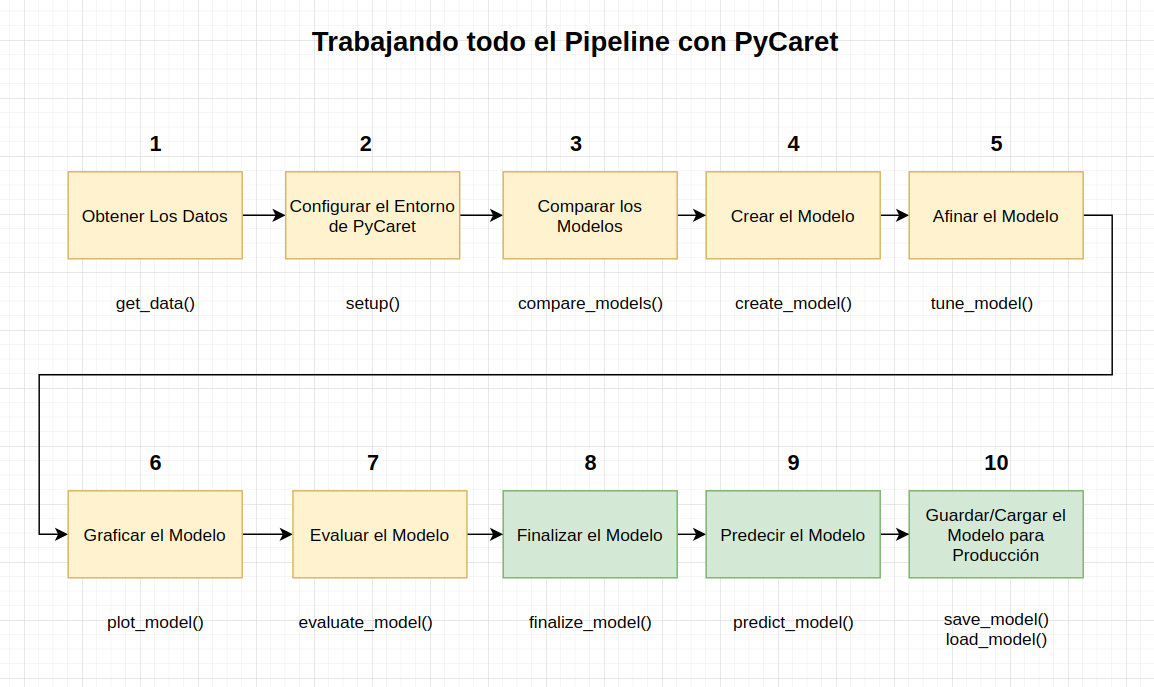

Otra forma de analizar el rendimiento del modelo es utilizar la función `evaluate_model()` que muestra una interfaz de usuario para todos los gráficos disponibles para un modelo determinado. Internamente utiliza la función `plot_model()`.

In [34]:
## evaluate_model(tuned_rf)

Un widget de Jupyter no se ha podido mostrar porque no se ha podido encontrar el estado del widget. Esto podría ocurrir si el núcleo que almacena el widget ya no está disponible, o si el estado del widget no se guardó en el notebook. Es posible que puedas crear el widget ejecutando las celdas correspondientes.

## 8- Finalizar el modelo

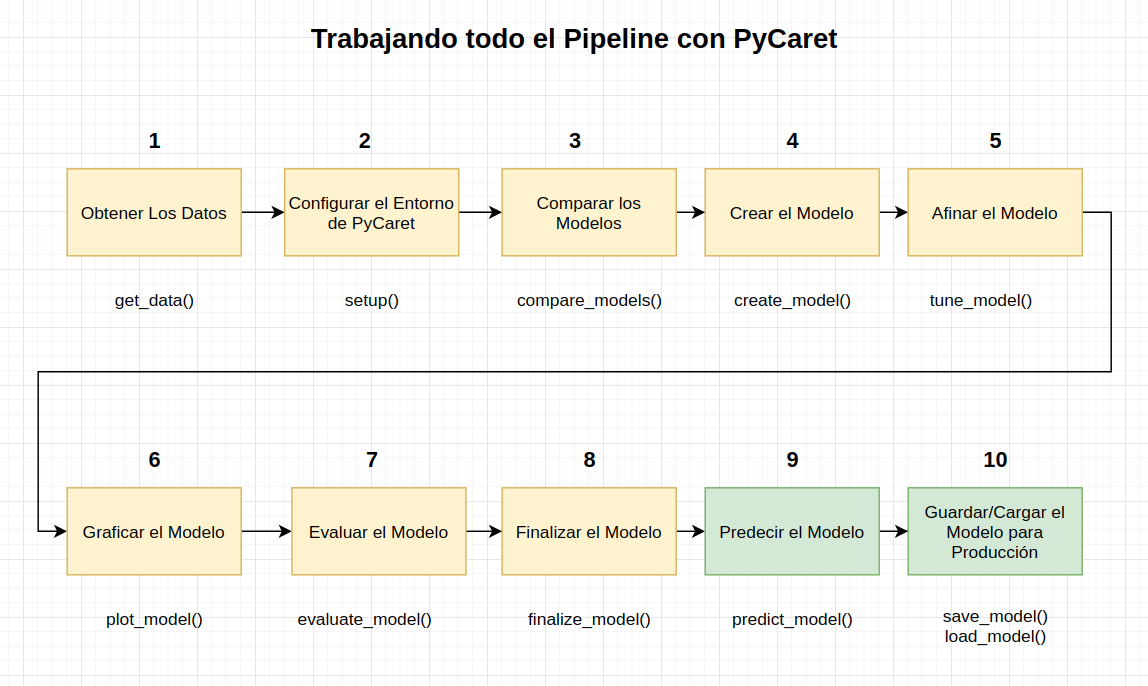

La finalización del modelo es el último paso del experimento. Un flujo de trabajo normal de aprendizaje automático en PyCaret comienza con `setup()`, seguido de la comparación de todos los modelos usando `compare_models()` y la preselección de algunos modelos candidatos (basados en la métrica de interés) para realizar varias técnicas de modelado, como el ajuste de hiperparámetros, el ensamblaje, el apilamiento, etc.

Este flujo de trabajo le conducirá finalmente al mejor modelo a utilizar para hacer predicciones sobre datos nuevos y no vistos. La función `finalizar_modelo()` ajusta el modelo al conjunto completo de datos, incluyendo la muestra de test (30% en este caso). El propósito de esta función es entrenar el modelo en el conjunto completo de datos antes de que se despliegue en producción. Podemos ejecutar este método después o antes de `predict_model()`. Vamos a ejecutarlo después de él.

Una última advertencia. Una vez que el modelo se finaliza utilizando `finalize_model()`, todo el conjunto de datos, incluyendo el conjunto de prueba, se utiliza para el entrenamiento. Por lo tanto, si el modelo se utiliza para hacer predicciones sobre el conjunto de pruebas después de utilizar `finalize_model()`, la tabla de información impresa será engañosa, ya que está tratando de hacer predicciones sobre los mismos datos que se utilizaron para el modelado.

Para demostrar este punto, utilizaremos `final_rf` en `predict_model()` para comparar la tabla de información con la anterior. 

In [36]:
final_rf = finalize_model(tuned_rf)

In [37]:
#Parámetros finales del modelo Random Forest para su despliegue a producción
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


## 9- Predicción con el modelo

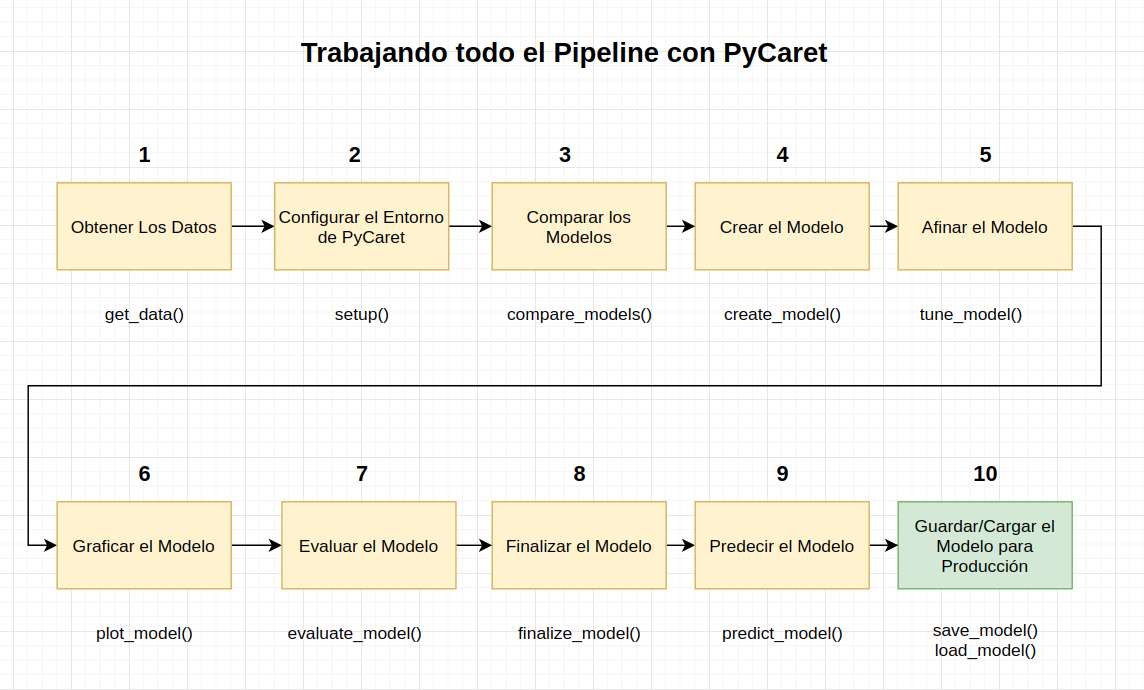

Antes de finalizar el modelo, es aconsejable realizar una última comprobación prediciendo el **conjunto de validación/retención (`data_unseen` en nuestro caso)** y revisando las métricas de evaluación. Si observamos la tabla de información, veremos que el 30% (6.841 muestras) de los datos han sido separados como muestras de training/set.

Todas las métricas de evaluación que hemos visto anteriormente son resultados de validación cruzada basados únicamente en el conjunto de entrenamiento (70%). Ahora, utilizando nuestro modelo de entrenamiento final almacenado en la variable `tuned_rf` predecimos contra la muestra de prueba y evaluamos las métricas para ver si son materialmente diferentes de los resultados de CV

In [32]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,80000.0,29.0,6228.0,589.0,390.0,390.0,390.0,383.0,589.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
1,180000.0,30.0,149069.0,152317.0,156282.0,161163.0,172190.0,148963.0,7500.0,8000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9121
2,100000.0,26.0,18999.0,23699.0,9390.0,5781.0,8065.0,17277.0,5129.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
3,500000.0,36.0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9121
4,190000.0,47.0,192493.0,193297.0,193400.0,193278.0,192956.0,193039.0,7200.0,7222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,120000.0,44.0,75294.0,76465.0,74675.0,79629.0,77748.0,82497.0,3000.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5013
6837,50000.0,26.0,47095.0,48085.0,49039.0,49662.0,0.0,0.0,2073.0,2027.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8603
6838,80000.0,39.0,46401.0,39456.0,30712.0,29629.0,28241.0,28030.0,1560.0,1421.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
6839,200000.0,33.0,50612.0,10537.0,5552.0,2506.0,9443.0,11818.0,10023.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051


La precisión del conjunto de pruebas es de `0,8199` en comparación con el `0,8203` obtenido en los resultados del `tuned_rf`. 

No es una diferencia significativa. Si hay una gran variación entre los resultados del conjunto de prueba y el conjunto de entrenamiento, esto indicaría normalmente un sobreajuste, pero también podría deberse a otros factores y requeriría una investigación más profunda.

En este caso, procederemos a completar el modelo y la predicción sobre datos no vistos (el 5% que habíamos separado al principio y que nunca fue expuesto a PyCaret).

(**TIP**: Siempre es bueno mirar la desviación estándar de los resultados del conjunto de entrenamiento cuando se utiliza `create_model()`.

La función `predict_model()` también se utiliza para predecir sobre el conjunto de datos no vistos. La única diferencia es que esta vez pasaremos el parámetro `data_unseen`. `data_unseen` es la variable creada al principio del tutorial y contiene el 5% (1200 muestras) del conjunto de datos original que nunca fue expuesto a PyCaret.

In [33]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


**Por favor, vaya a la última columna de este resultado anterior, y verá una nueva característica llamada `Score`**

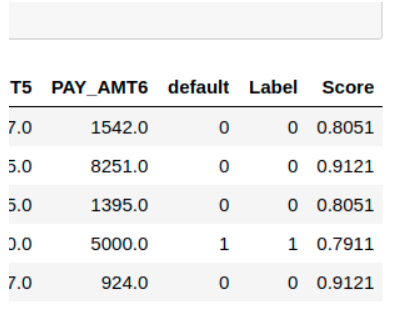

`Label` es la predicción y `Score` es la probabilidad de la predicción. Obsérvese que los resultados predichos se concatenan con el conjunto de datos original, mientras que todas las transformaciones se realizan automáticamente en segundo plano.

Hemos terminado el experimento finalizando el modelo `tuned_rf` que ahora se almacena en la variable `final_rf`. También hemos utilizado el modelo almacenado en `final_rf` para predecir `data_unseen`. Esto nos lleva al final de nuestro experimento, pero queda una pregunta: ¿Qué ocurre cuando se tienen más datos nuevos que predecir? ¿Hay que volver a hacer todo el experimento? La respuesta es no, la función incorporada de PyCaret `save_model()` permite guardar el modelo junto con toda la tubería de transformación para su uso posterior y se almacena en un Pickle en el entorno local

(**TIP**: Siempre es bueno utilizar la fecha en el nombre del archivo al guardar los modelos, es bueno para el control de versiones)

Veámoslo en el siguiente paso

## 10- Guardar/Cargar modelo para producción

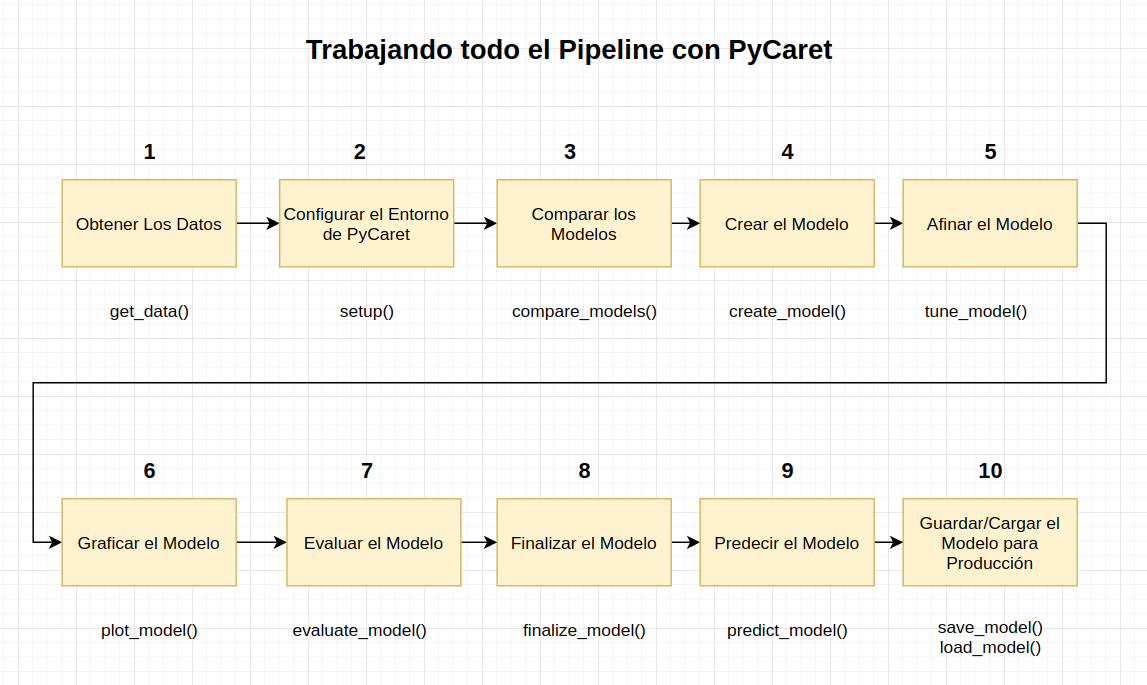

### Save Model

In [38]:
save_model(final_rf, 'datasets/Final_RF_Model_29Jan2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

### Cargar modelo

Para cargar un modelo guardado en una fecha futura en el mismo entorno o en uno alternativo, utilizaríamos la función `load_model()` de PyCaret y luego aplicaríamos fácilmente el modelo guardado a nuevos datos no vistos para la predicción

In [39]:
saved_final_rf = load_model('datasets/Final_RF_Model_29Jan2021')

Transformation Pipeline and Model Successfully Loaded


Una vez cargado el modelo en el entorno, simplemente se puede utilizar para predecir cualquier dato nuevo utilizando la misma función `predict_model()`. A continuación hemos aplicado el modelo cargado para predecir los mismos `data_unseen` que utilizamos antes.

In [40]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [41]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


In [42]:
from pycaret.utils import check_metric
check_metric(new_prediction.default, new_prediction.Label, 'Accuracy')

0.8167

## Pros y contras

Como ocurre con cualquier librería nueva, todavía hay margen de mejora. Vamos a enumerar algunos de los pros y contras que hemos encontrado al utilizar la biblioteca.

### Pros:
* Hace que la parte de modelado de su proyecto sea mucho más fácil. 
* Puedes crear muchos análisis diferentes con una sola línea de código.
* Olvídate de pasar una lista de parámetros al ajustar el modelo. PyCaret lo hace automáticamente por ti.
* Tienes muchas opciones diferentes para evaluar el modelo, de nuevo, con una sola línea de código
* Como está construido sobre famosas librerías de ML, puedes compararlo fácilmente con tu método tradicional

### Contras:
* La librería está en sus primeras versiones, por lo que no está lo suficientemente madura y es susceptible de tener bugs. No es un gran problema para ser honesto
* Como todas las librerías de Auto ML, es una caja negra, por lo que no se puede ver realmente lo que pasa dentro de ella. Por lo tanto, no lo recomendaría para los principiantes.
* Puede hacer que el proceso de aprendizaje sea un poco superficial.

## Conclusiones
Este tutorial ha cubierto todo el proceso de ML, desde la ingestión de datos, el preprocesamiento, el entrenamiento del modelo, el ajuste de hiperparámetros, la predicción y el almacenamiento del modelo para su uso posterior. Hemos completado todos estos pasos en menos de 10 comandos que están construidos de forma natural y son muy intuitivos de recordar, como `create_model(), tune_model(), compare_model()`. Recrear todo el experimento sin PyCaret habría requerido más de 100 líneas de código en la mayoría de las bibliotecas.

La biblioteca también permite hacer cosas más avanzadas, como el preprocesamiento avanzado, el ensamblaje, el apilamiento generalizado y otras técnicas que permiten personalizar completamente el pipeline de Machine Learning y son imprescindibles para cualquier científico de datos